In [ ]:
# Importing the SparkSession module from the pyspark.sql
from pyspark.sql import SparkSession

# In Spark we are initializing the spark session named as "BreweryOperationsMarketAnalysis".
# The getOrCreate method ensures that if session already exists then it will be reused, otherwise it will be created.   
spark = SparkSession.builder.appName("BreweryOperationsMarketAnalysis").getOrCreate()

In [2]:
# Loading the dataset into our environment.
bucket_name = "storage-bucket2023"
dataset_name = "brewery_data_complete_extended.csv"

# Full path to the file in GCS
full_file_path = f"gs://{bucket_name}/{dataset_name}"

# Read the dataset into a DataFrame
df = spark.read.format("csv").option("header", "true").load(full_file_path)

## Exploring the Dataset

In [3]:
# Display the Schema of our dataframe: Here we can get good understanding the data types and structure of our dataset.
df.printSchema()

root
 |-- Batch_ID: string (nullable = true)
 |-- Brew_Date: string (nullable = true)
 |-- Beer_Style: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Fermentation_Time: string (nullable = true)
 |-- Temperature: string (nullable = true)
 |-- pH_Level: string (nullable = true)
 |-- Gravity: string (nullable = true)
 |-- Alcohol_Content: string (nullable = true)
 |-- Bitterness: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Ingredient_Ratio: string (nullable = true)
 |-- Volume_Produced: string (nullable = true)
 |-- Total_Sales: string (nullable = true)
 |-- Quality_Score: string (nullable = true)
 |-- Brewhouse_Efficiency: string (nullable = true)
 |-- Loss_During_Brewing: string (nullable = true)
 |-- Loss_During_Fermentation: string (nullable = true)
 |-- Loss_During_Bottling_Kegging: string (nullable = true)



> By observing the above schema we can say that out Dataset has 20 columns, and all of them are currently interpreted as string (text) data types.

In [4]:
# Displaying first two rows of the DataFrame.
# Here we have also used vertical = True to display it in a vertical view cause the horizontal was not in understandable format.
df.show(2,vertical=True)

-RECORD 0-------------------------------------------
 Batch_ID                     | 7870796             
 Brew_Date                    | 2020-01-01 00:00:19 
 Beer_Style                   | Wheat Beer          
 SKU                          | Kegs                
 Location                     | Whitefield          
 Fermentation_Time            | 16                  
 Temperature                  | 24.204250857069873  
 pH_Level                     | 5.2898454476095615  
 Gravity                      | 1.0395041267301979  
 Alcohol_Content              | 5.370842159553436   
 Bitterness                   | 20                  
 Color                        | 5                   
 Ingredient_Ratio             | 1:0.32:0.16         
 Volume_Produced              | 4666                
 Total_Sales                  | 2664.7593448382822  
 Quality_Score                | 8.57701633109399    
 Brewhouse_Efficiency         | 89.19588216376087   
 Loss_During_Brewing          | 4.104987659187

In [5]:
# Basic Statistics: Here with the help of describe() method to obtain summary statistics for numerical columns.
df.describe().show(n=5, truncate=False, vertical=True)

-RECORD 0-------------------------------------------
 summary                      | count               
 Batch_ID                     | 10000000            
 Brew_Date                    | 10000000            
 Beer_Style                   | 10000000            
 SKU                          | 10000000            
 Location                     | 10000000            
 Fermentation_Time            | 10000000            
 Temperature                  | 10000000            
 pH_Level                     | 10000000            
 Gravity                      | 10000000            
 Alcohol_Content              | 10000000            
 Bitterness                   | 10000000            
 Color                        | 10000000            
 Ingredient_Ratio             | 10000000            
 Volume_Produced              | 10000000            
 Total_Sales                  | 10000000            
 Quality_Score                | 10000000            
 Brewhouse_Efficiency         | 10000000      

> Dataset appears to includes 10,000,000 records (rows). Here's an interpretation of the summary statistics:

    Batch_ID: The unique identifier for each batch. It ranges from '0000000' to '9999999'.

    Brew_Date: Dates of brewing, ranging from '2020-01-01' to '2023-12-31'. 

    Beer_Style: Different styles of beer are recorded, such as 'Ale' and 'Wheat Beer'.

    Fermentation_Time, Temperature, pH_Level, Gravity, Alcohol_Content, Bitterness, Color, Volume_Produced, Total_Sales, Quality_Score, Brewhouse_Efficiency, Loss_During_Brewing, Loss_During_Fermentation, Loss_During_Bottling_Kegging: These are numerical columns.

    Location, SKU, Ingredient_Ratio: These are categorical/textual columns. 'Location' has values like 'Electronic City' and 'Yelahanka', 'SKU' includes types like 'Bottles' and 'Pints', and 'Ingredient_Ratio' shows different ingredient ratios used.

    Numerical Data Interpretation: The mean, standard deviation, min, and max values for numerical columns provide insights into the central tendency and dispersion of these measurements. For instance, the average (mean) Fermentation Time is approximately 14.5 days, and the average Alcohol Content is about 5.25%.

### Check for Distinct Values

> Inorder to know unusual or unexpected values that might indicate data entry errors. <br> 
Very high or low frequencies of certain values, which could suggest data quality issues or biases.
In the below section we are displaying the different records that exists in the several columns of our dataset.


In [6]:
df.select("Beer_Style").distinct().show()

+----------+
|Beer_Style|
+----------+
|    Porter|
|      Sour|
|     Lager|
|Wheat Beer|
|   Pilsner|
|     Stout|
|       Ale|
|       IPA|
+----------+



> There are 8 distinct beer styles: Porter, Sour, Lager, Wheat Beer, Pilsner, Ale, Stout, and IPA.
This indicates a good variety in beer styles. There are no unexpected or unusual beer styles, which is a good sign for data consistency in this column.

In [7]:
df.select("SKU").distinct().show()

+-------+
|    SKU|
+-------+
|  Pints|
|   Kegs|
|Bottles|
|   Cans|
+-------+



> There are 4 distinct SKUs: Pints, Kegs, Bottles, Cans.
The SKUs cover different packaging types, and the data here seems consistent and relevant for brewery operations. No anomalies or unusual values are observed.

In [8]:
df.select("Location").distinct().show()

+---------------+
|       Location|
+---------------+
|    Indiranagar|
|    Malleswaram|
|      Jayanagar|
|Electronic City|
|      Yelahanka|
|    Rajajinagar|
|    Koramangala|
|     HSR Layout|
|     Whitefield|
|   Marathahalli|
+---------------+



> There are 10 distinct locations are listed: Indiranagar, Malleswaram, Jayanagar, Electronic City, Yelahanka, Rajajinagar, Koramangala, HSR Layout, Whitefield, Marathahalli.
These locations likely represent different areas or outlets where the beer is brewed or sold. The data seems consistent and relevant for location-based analysis.

In [9]:
df.select("Ingredient_Ratio").distinct().show()

+----------------+
|Ingredient_Ratio|
+----------------+
|     1:0.41:0.14|
|     1:0.49:0.17|
|     1:0.27:0.17|
|     1:0.22:0.13|
|     1:0.38:0.30|
|     1:0.27:0.15|
|     1:0.43:0.10|
|     1:0.39:0.23|
|     1:0.47:0.27|
|     1:0.21:0.19|
|     1:0.31:0.13|
|     1:0.31:0.30|
|     1:0.22:0.18|
|     1:0.43:0.25|
|     1:0.46:0.12|
|     1:0.20:0.11|
|     1:0.22:0.11|
|     1:0.26:0.15|
|     1:0.20:0.16|
|     1:0.34:0.30|
+----------------+
only showing top 20 rows



> The ingredient ratios are in a consistent format (like 1:0.41:0.14). They likely represent proportions of different ingredients used in brewing.

In [10]:
df.select("Alcohol_Content").distinct().show()

+------------------+
|   Alcohol_Content|
+------------------+
|5.3878226526429795|
| 5.497590248050024|
| 5.763248314539847|
|5.0705494825892865|
| 5.021536523317027|
| 5.926712924117455|
| 5.281543480032966|
| 5.589662479715067|
| 4.546977692968765|
|  5.33450503368112|
|5.4024477478251995|
| 4.558728591874204|
| 4.761607025297239|
| 4.779165974078305|
| 5.435973498267894|
| 5.966343608817082|
| 5.135286478457616|
|5.6752793929737875|
| 5.215895039283885|
| 5.288029083990382|
+------------------+
only showing top 20 rows



> The alcohol content values appear to be in a numerical and consistent format, suggesting they are accurately recorded. The range of values seems realistic for beer. 

In [11]:
df.select("Brew_Date").distinct().show()

+-------------------+
|          Brew_Date|
+-------------------+
|2020-03-15 22:06:23|
|2020-03-15 23:03:15|
|2020-03-15 23:25:36|
|2020-03-15 23:27:24|
|2020-03-16 03:23:41|
|2020-03-16 04:37:15|
|2020-03-16 06:10:15|
|2020-03-16 06:39:46|
|2020-03-16 07:52:14|
|2020-03-16 09:01:11|
|2020-03-16 10:09:34|
|2020-03-16 11:01:35|
|2020-03-16 15:00:30|
|2020-03-16 15:11:13|
|2020-03-16 16:06:27|
|2020-03-16 16:12:31|
|2020-03-16 16:31:26|
|2020-03-16 16:32:37|
|2020-03-16 17:28:03|
|2020-03-16 17:31:30|
+-------------------+
only showing top 20 rows



> We will the fix the data format for this in further steps.

In [12]:
df.select("Temperature").distinct().show()

+------------------+
|       Temperature|
+------------------+
|20.164526481670993|
|24.481705928683272|
|15.332661897151388|
|16.069585853739063|
| 20.74977895050628|
|19.768591097401995|
|22.107849199144045|
|21.715900007581126|
| 19.31660278997415|
| 23.05907484708682|
| 24.55483083937112|
|24.982735870793054|
|  15.3869611724207|
| 21.66720432265437|
|20.316306479888286|
|17.642230515844847|
| 21.28339533841166|
| 24.14552932731973|
|24.164887679079275|
|19.392665728289792|
+------------------+
only showing top 20 rows



> Need to fix data format to float in further steps.

In [13]:
df.select("pH_Level").distinct().show()

+-----------------+
|         pH_Level|
+-----------------+
| 4.65271307858278|
|5.220062187608619|
|5.390699849406383|
|4.781769341997755|
|5.309075467947444|
|4.959718727643788|
|5.336154044068497|
|4.902799096235809|
| 5.14672736249385|
|4.923090502242896|
|4.692325179097728|
|5.013196152240722|
|5.320777158146872|
|4.766687980064736|
|5.129561405157777|
|4.843195455138553|
|4.879261770480644|
|4.607592655064701|
|4.825349125374988|
|4.625823094943024|
+-----------------+
only showing top 20 rows



In [14]:
df.select("Gravity").distinct().show()

+------------------+
|           Gravity|
+------------------+
|1.0795656705234926|
|1.0539547275605838|
|1.0304833874580765|
| 1.057749839220157|
|1.0653695792304003|
|1.0723417693720823|
| 1.054442395200138|
|1.0553492376701339|
|1.0681614372745272|
|1.0791929021784559|
|1.0367850783514536|
|1.0376410970971197|
|1.0520503760108457|
|1.0377249051777842|
|1.0506134891870134|
| 1.049257541214239|
|1.0334838656023093|
|1.0612813978498719|
|1.0574086008738501|
|1.0543967650574522|
+------------------+
only showing top 20 rows



In [15]:
df.select("Bitterness").distinct().show()

+----------+
|Bitterness|
+----------+
|        51|
|        54|
|        29|
|        42|
|        30|
|        34|
|        59|
|        28|
|        22|
|        35|
|        52|
|        47|
|        43|
|        31|
|        27|
|        26|
|        46|
|        23|
|        41|
|        55|
+----------+
only showing top 20 rows



In [16]:
df.select("Color").distinct().show()

+-----+
|Color|
+-----+
|    7|
|   15|
|   11|
|    8|
|   16|
|    5|
|   18|
|   17|
|    6|
|   19|
|    9|
|   10|
|   12|
|   13|
|   14|
+-----+



In [17]:
df.select("Volume_Produced").distinct().show()

+---------------+
|Volume_Produced|
+---------------+
|           4821|
|           1159|
|            675|
|           2294|
|           2162|
|           3959|
|           4937|
|            691|
|           1512|
|           2136|
|            829|
|           2904|
|           3606|
|           2069|
|           4032|
|           1572|
|           1090|
|           3210|
|           1436|
|           2088|
+---------------+
only showing top 20 rows



In [18]:
df.select("Total_Sales").distinct().show()

+------------------+
|       Total_Sales|
+------------------+
| 5321.855955090253|
|4732.5694708791125|
|  4575.12325062862|
| 7527.316173934206|
|18642.873567519404|
| 17058.25269045832|
|  5625.82312271543|
|14164.715476016625|
| 18201.70828924999|
|7867.0019695152305|
|13316.273514747858|
| 4484.683851404478|
| 5185.998114402674|
|11646.428097674567|
|2810.4779098536355|
| 9394.921133581222|
| 5271.315191398219|
| 5998.381675645802|
| 11865.25742362217|
|10986.242158231431|
+------------------+
only showing top 20 rows



In [19]:
df.select("Quality_Score").distinct().show()

+-----------------+
|    Quality_Score|
+-----------------+
|7.897965982851785|
|7.585922903762023|
|6.788715716530039|
|9.684232922836259|
|9.186063409402756|
|7.370966137113898|
|7.005514882313648|
|6.399930462299388|
|7.767663720161012|
|6.457580140019025|
|7.904986316710252|
|8.693693676704239|
|9.455117652741215|
|9.312384230202701|
|8.096333992221968|
|6.996729302158755|
|8.991662013492764|
| 7.84481861854627|
|8.920199797813254|
| 8.29271326378209|
+-----------------+
only showing top 20 rows



In [20]:
df.select("Brewhouse_Efficiency").distinct().show()

+--------------------+
|Brewhouse_Efficiency|
+--------------------+
|   85.46686276913832|
|   81.06426306452799|
|   70.97740780262517|
|   75.61151208674254|
|   86.27952252154155|
|    79.4376447153102|
|   80.97206178715858|
|   75.53906126129641|
|   88.47354164234524|
|   88.63560108863231|
|   86.95015381295323|
|   89.34540998878528|
|   87.08274887756353|
|   87.71575787386843|
|   70.73187366405348|
|   87.24350449384777|
|   78.91396359932405|
|   76.92640947524521|
|   78.98991911766325|
|    84.6236862658042|
+--------------------+
only showing top 20 rows



In [21]:
df.select("Loss_During_Brewing").distinct().show()

+-------------------+
|Loss_During_Brewing|
+-------------------+
| 1.0035973242385365|
|  2.512593858022537|
|  3.654540605723161|
| 1.1978422035268852|
| 2.0576824914482224|
|  4.053499287554645|
|  1.162299922966413|
| 1.5010596165401968|
|  4.283389496929628|
| 1.5633314925385897|
| 3.4266649307787036|
|  4.522378703673654|
| 2.1876352339230327|
|  1.713216152914256|
| 1.0090349126602254|
|  2.399077952829538|
|  3.154551644728773|
|  4.801705395706743|
| 4.6592111522104345|
| 1.8062158241420891|
+-------------------+
only showing top 20 rows



In [22]:
df.select("Loss_During_Fermentation").distinct().show()

+------------------------+
|Loss_During_Fermentation|
+------------------------+
|      3.3321133087984025|
|       1.341123427783701|
|      3.9138195017563033|
|       4.454994895212392|
|       4.415277762938855|
|       1.648233803996085|
|      1.4558877972779825|
|      2.4503886006223627|
|      2.1729093075912163|
|      1.9651260619149187|
|      2.1048840823222705|
|       4.435041175199488|
|      3.4894823320488424|
|      1.7240697966821945|
|        3.60232335642881|
|       2.475095382243187|
|      1.8777854912810668|
|      1.0754938815123638|
|      3.3053827653874257|
|      1.4627720226461998|
+------------------------+
only showing top 20 rows



In [23]:
df.select("Loss_During_Bottling_Kegging").distinct().show()

+----------------------------+
|Loss_During_Bottling_Kegging|
+----------------------------+
|             4.6210141266556|
|          3.2244224467423472|
|           3.133803135061469|
|          3.3315548142705143|
|            3.85799633006212|
|          3.5590502931123873|
|            3.54235068832438|
|           4.997677208541715|
|          3.9140533906726827|
|          3.6442539219620174|
|           3.131931160098565|
|           3.146277110036294|
|          2.4939540282364008|
|          3.8123039164277754|
|          1.5319838464842848|
|          2.5866285678877263|
|           2.290234403324638|
|          2.1323492586587833|
|           4.310254843504597|
|          1.2509760955406546|
+----------------------------+
only showing top 20 rows



## Clean the Dataset

> Data cleaning involves handling missing values, outliers, and incorrect data formats.

In [24]:
# Handle Missing Values: 
# First we are importing necessary functions from the pyspark module which will be helpful in handling the missing values.
from pyspark.sql.functions import col, count, isnan, when
# Here with the use of col(c) we are iterating through all the columns, when and count counts the missing value and then 
# we are displaying the result with the show function.
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show(vertical=True)

-RECORD 0---------------------------
 Batch_ID                     | 0   
 Brew_Date                    | 0   
 Beer_Style                   | 0   
 SKU                          | 0   
 Location                     | 0   
 Fermentation_Time            | 0   
 Temperature                  | 0   
 pH_Level                     | 0   
 Gravity                      | 0   
 Alcohol_Content              | 0   
 Bitterness                   | 0   
 Color                        | 0   
 Ingredient_Ratio             | 0   
 Volume_Produced              | 0   
 Total_Sales                  | 0   
 Quality_Score                | 0   
 Brewhouse_Efficiency         | 0   
 Loss_During_Brewing          | 0   
 Loss_During_Fermentation     | 0   
 Loss_During_Bottling_Kegging | 0   



> By results we can say that there are no missing values (null values) in any of the columns 

In [25]:
# Here we are checking for the duplicate records in our dataset.
duplicate_rows = df.count() - df.distinct().count()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [26]:
# Fixing Data types.
# Here we are using cast() method which is useful in converting the datatypes.
# .withColumn() is useful in replacing the modified column with the old one. 
from pyspark.sql.types import IntegerType, FloatType, DateType

df = df.withColumn("Batch_ID", col("Batch_ID").cast(IntegerType()))
df = df.withColumn("Brew_Date", col("Brew_Date").cast(DateType()))
df = df.withColumn("Fermentation_Time", col("Fermentation_Time").cast(IntegerType()))
df = df.withColumn("Temperature", col("Temperature").cast(FloatType()))
df = df.withColumn("pH_Level", col("pH_Level").cast(FloatType()))
df = df.withColumn("Gravity", col("Gravity").cast(FloatType()))
df = df.withColumn("Alcohol_Content", col("Alcohol_Content").cast(FloatType()))
df = df.withColumn("Bitterness", col("Bitterness").cast(IntegerType()))
df = df.withColumn("Color", col("Color").cast(IntegerType()))
df = df.withColumn("Volume_Produced", col("Volume_Produced").cast(IntegerType()))
df = df.withColumn("Total_Sales", col("Total_Sales").cast(FloatType()))
df = df.withColumn("Quality_Score", col("Quality_Score").cast(FloatType()))
df = df.withColumn("Brewhouse_Efficiency", col("Brewhouse_Efficiency").cast(FloatType()))
df = df.withColumn("Loss_During_Brewing", col("Loss_During_Brewing").cast(FloatType()))
df = df.withColumn("Loss_During_Fermentation", col("Loss_During_Fermentation").cast(FloatType()))
df = df.withColumn("Loss_During_Bottling_Kegging", col("Loss_During_Bottling_Kegging").cast(FloatType()))

In [27]:
# Checking datatype of the columns again
df.printSchema()

root
 |-- Batch_ID: integer (nullable = true)
 |-- Brew_Date: date (nullable = true)
 |-- Beer_Style: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Fermentation_Time: integer (nullable = true)
 |-- Temperature: float (nullable = true)
 |-- pH_Level: float (nullable = true)
 |-- Gravity: float (nullable = true)
 |-- Alcohol_Content: float (nullable = true)
 |-- Bitterness: integer (nullable = true)
 |-- Color: integer (nullable = true)
 |-- Ingredient_Ratio: string (nullable = true)
 |-- Volume_Produced: integer (nullable = true)
 |-- Total_Sales: float (nullable = true)
 |-- Quality_Score: float (nullable = true)
 |-- Brewhouse_Efficiency: float (nullable = true)
 |-- Loss_During_Brewing: float (nullable = true)
 |-- Loss_During_Fermentation: float (nullable = true)
 |-- Loss_During_Bottling_Kegging: float (nullable = true)



> In the initial part of this project we have seen that the datatypes of all the feature were string but after handling the datatypes we can now see that each feature has it's own appropriate datatypes.

In [28]:
# Show two rows of the DataFrame
df.show(2,vertical=True)

-RECORD 0-----------------------------------
 Batch_ID                     | 7870796     
 Brew_Date                    | 2020-01-01  
 Beer_Style                   | Wheat Beer  
 SKU                          | Kegs        
 Location                     | Whitefield  
 Fermentation_Time            | 16          
 Temperature                  | 24.20425    
 pH_Level                     | 5.2898455   
 Gravity                      | 1.0395042   
 Alcohol_Content              | 5.370842    
 Bitterness                   | 20          
 Color                        | 5           
 Ingredient_Ratio             | 1:0.32:0.16 
 Volume_Produced              | 4666        
 Total_Sales                  | 2664.7593   
 Quality_Score                | 8.577016    
 Brewhouse_Efficiency         | 89.195885   
 Loss_During_Brewing          | 4.1049876   
 Loss_During_Fermentation     | 3.235485    
 Loss_During_Bottling_Kegging | 4.6632047   
-RECORD 1-----------------------------------
 Batch_ID 

## Data Analysis

#### Distribution of Sales by Beer Style

> This analysis will help us understand which beer styles are more popular in terms of sales.


In [29]:
from pyspark.sql.functions import to_date, col, sum

# Here first we are grouping the dataframe by the "Beer_Style" and counting totals of sale for each type.
sales_by_beer_style = df.groupBy("Beer_Style").agg(sum("Total_Sales").alias("Total_Sales"))

# sorting the sales_by_beer_style DataFrame based on the "Total_Sales" column in descending order for better visualization.
sales_by_beer_style = sales_by_beer_style.orderBy("Total_Sales", ascending=False)

# Showing the result (for verification)
sales_by_beer_style.show()

+----------+--------------------+
|Beer_Style|         Total_Sales|
+----------+--------------------+
|       Ale|1.314638271116351...|
|    Porter|1.313051202577716E10|
|      Sour|1.312554186593457E10|
|   Pilsner|1.312235003343536...|
|     Lager|1.311766538680041...|
|     Stout|1.311502583628442...|
|       IPA|1.311356920467315...|
|Wheat Beer|1.310680637579443...|
+----------+--------------------+



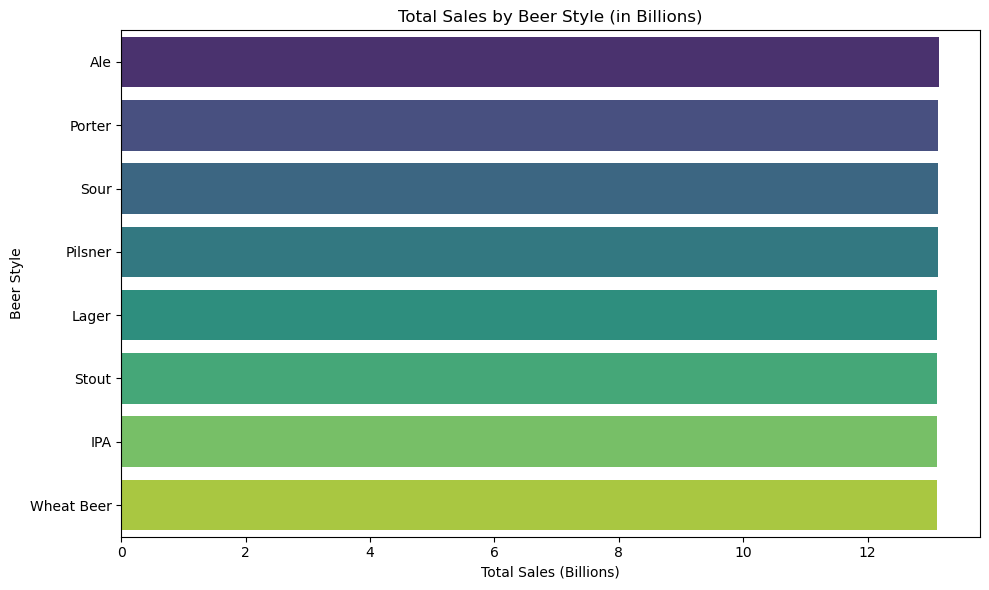

In [30]:
# Importing the matplot and seaborn for the visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Here we are converting the the pyspark dataframe to pandas dataframe. This way we can leverage the extensive plotting capabilities of pandas and seaboarn.
plot_data = sales_by_beer_style.toPandas()

# here the total sales values are scaled by dividing them by 1 billion, making the scale more readable in the plot.
plot_data['Total_Sales'] = plot_data['Total_Sales'] / 1e9

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Sales', y='Beer_Style', data=plot_data, palette='viridis')
plt.title('Total Sales by Beer Style (in Billions)')
plt.xlabel('Total Sales (Billions)')
plt.ylabel('Beer Style')
plt.tight_layout()
plt.show()

> The results indicate the total sales for each beer style. The Beer_Style with the highest total sales is listed first, and so on.
All beer styles have significant sales, but there are slight differences between them.
For instance, Ale appears to be the top-selling beer style, followed closely by Porter, Sour, and others.

#### Proportion of Sales by Location

> We'll calculate the total sales for each location and then visualize this data using a pie chart, which will show the contribution of each location to the overall sales.

In [31]:
# Here first we are grouping the dataframe by the "Location" and counting totals of sale for each type.
sales_by_location = df.groupBy("Location").agg(sum("Total_Sales").alias("Total_Sales"))

# Here we are converting the the pyspark dataframe to pandas dataframe.
plot_data = sales_by_location.toPandas()

# Showing the result
sales_by_location.show()

+---------------+--------------------+
|       Location|         Total_Sales|
+---------------+--------------------+
|    Indiranagar|1.048663243771002...|
|    Malleswaram|1.049514384767785...|
|      Jayanagar|1.050479534537005...|
|Electronic City|1.048471962942779...|
|      Yelahanka|1.049963341236767...|
|    Rajajinagar|1.050503810091668...|
|    Koramangala|1.049711107753332...|
|     HSR Layout|1.051387798077227...|
|     Whitefield|1.049013752729309E10|
|   Marathahalli|1.050076408079425E10|
+---------------+--------------------+



> The results indicate the total sales for each location. Locations like HSR Layout, Marathahalli, and Rajajinagar appear among the top contributors based on these figures.
The sales figures are very close, suggesting a relatively even distribution of sales across different locations.

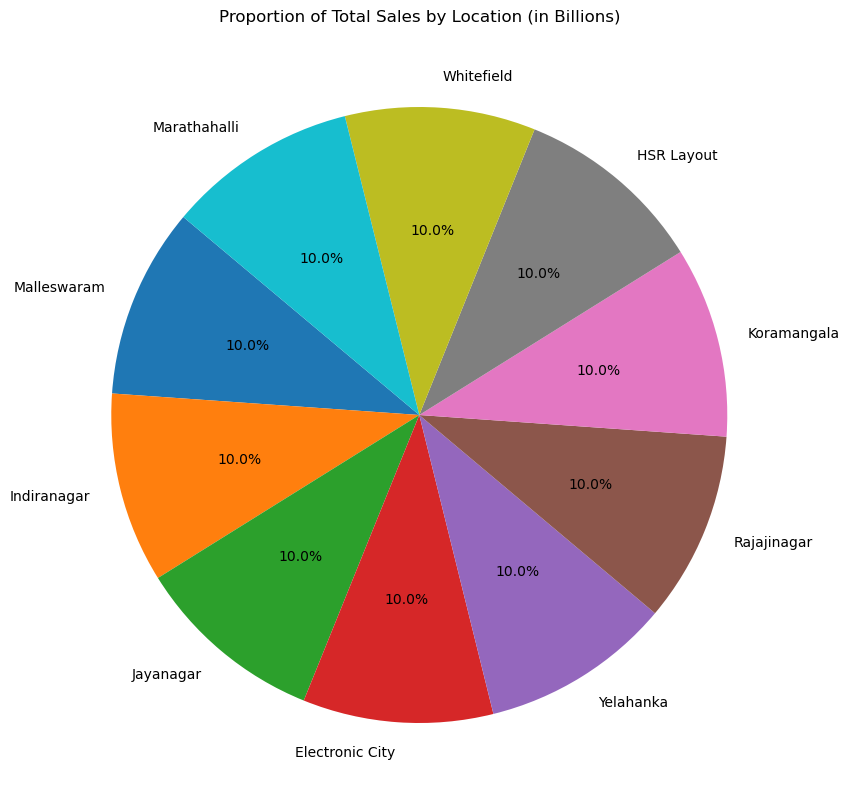

In [32]:
import matplotlib.pyplot as plt

# here the total sales values are scaled by dividing them by 1 billion, making the scale more readable in the plot.
plot_data['Total_Sales'] = plot_data['Total_Sales'] / 1e9

# Plotting
plt.figure(figsize=(12, 10))
plt.pie(plot_data['Total_Sales'], labels=plot_data['Location'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Total Sales by Location (in Billions)')
plt.show()

> Almost even sales in all areas

#### Average Quality Score by Fermentation Time

> Fermentation_Time along with the corresponding Average_Quality_Score. This information is crucial for understanding how the duration of fermentation impacts the perceived quality of the brew.

In [37]:
from pyspark.sql.functions import avg

# grouping the dataframe by "Fermentation_Time", and calculating the average quality score.
aggregated_data = df.groupBy("Fermentation_Time").agg(avg("Quality_Score").alias("Average_Quality_Score"))

# Convert to Pandas DataFrame for easier plotting
plot_data_agg = aggregated_data.toPandas()

# Showing the result.
aggregated_data.show()

+-----------------+---------------------+
|Fermentation_Time|Average_Quality_Score|
+-----------------+---------------------+
|               12|    8.000093315794533|
|               13|    8.000176426937589|
|               16|    8.000368510186078|
|               19|    8.000331750792814|
|               15|   7.9998613368827085|
|               17|    7.999904734529012|
|               10|     7.99955996769744|
|               11|   7.9994400016842855|
|               14|     8.00033749148616|
|               18|    7.998180141188392|
+-----------------+---------------------+



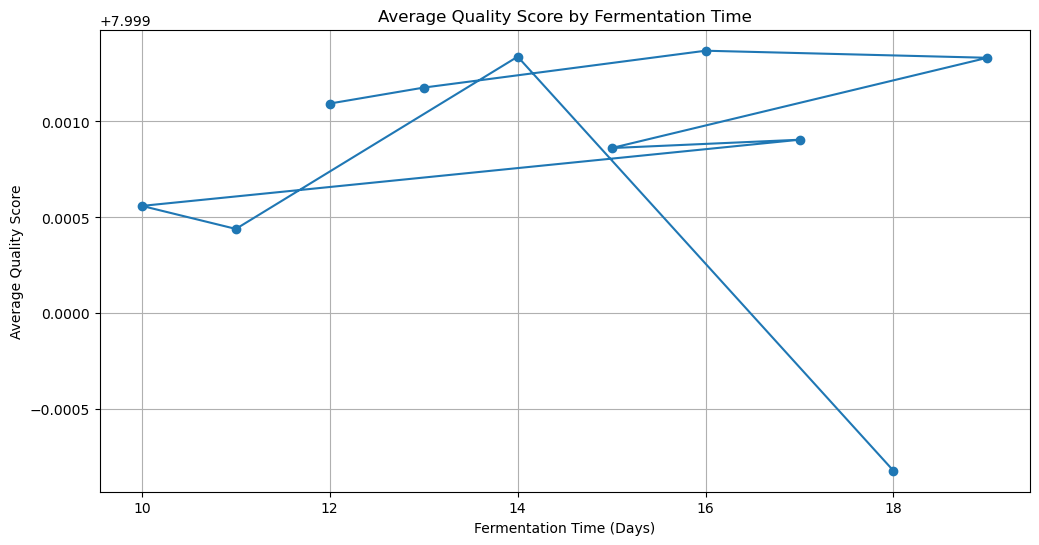

In [39]:
# Creating the plot
plt.figure(figsize=(12, 6))
plt.plot('Fermentation_Time', 'Average_Quality_Score', data=plot_data_agg, marker='o')
plt.title('Average Quality Score by Fermentation Time')
plt.xlabel('Fermentation Time (Days)')
plt.ylabel('Average Quality Score')
plt.grid(True)
plt.show()

> At certain fermentation times, such as around 12 to 13 days and 16 to 19 days, there appears to be an increase in the average quality score. However, this trend is not consistent across the range as there is a noticeable dip between 17 and 18 days.
The quality scores are generally clustered around the 8.0 mark, indicating a relatively high overall quality with minor variations.

## Conclusion

> Throughout the Brewery Operations Market Analysis project, we've leveraged the power of Apache Spark to process and analyze a large dataset from the brewery industry. Our journey took us through meticulous data cleaning, where we transformed and sanitized our data into a workable format. The exploratory data analysis phase revealed patterns within the data through the use of diverse visualizations. By analysing those kind of patterns one can tailor their product according to that and this can elevate customer satisfaction and loyalty. also Insights derived from Spark-powered analytics pave the way for informed strategies, positioning breweries for success. 
In future one can extend this project to leverage the machine learning for the forcasting purpose as well.

> The project's findings are encapsulated in :
Sales Distribution by Location,
Proportion of Sales by Location,
Quality Score by Fermentation Time